In [16]:
from GBM import MultiBS
import numpy as np

path1 = "datasets/UNH.csv"
path2 = "datasets/PFE.csv"
path3 = "datasets/MRK.csv"

multi_bs = MultiBS(path1, path2, path3)

forward_simulation = multi_bs.simulate_multi_GBM_exact(T=1, M=10000)
v, sigma = multi_bs.calibrate_model(forward_simulation)
simul = multi_bs.simulate_multi_GBM_exact(T=1, M=10)
# multi_bs.plot(simul)

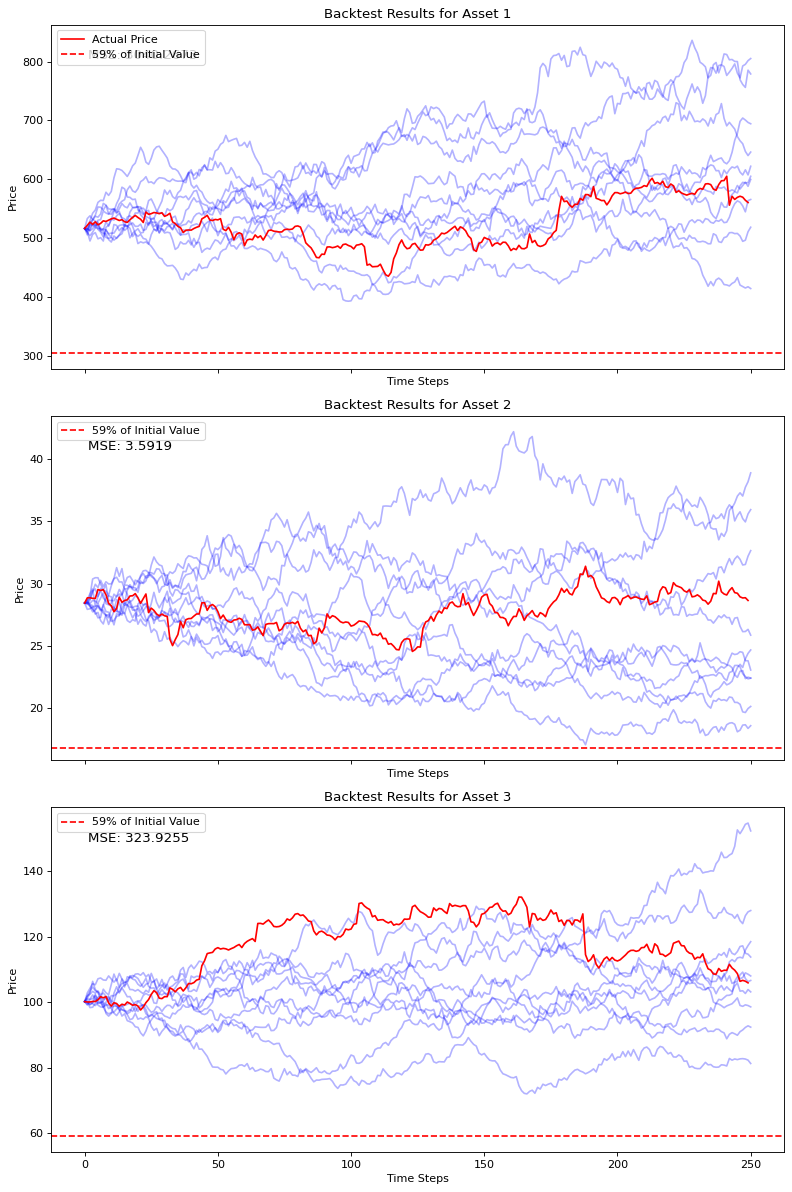

Mean Squared Error (MSE) for each asset: [3040.26729989    3.59189325  323.92548991]


array([3040.26729989,    3.59189325,  323.92548991])

In [17]:
multi_bs.backtest(T=1, M=10)

In [3]:
print(multi_bs.Sigma)

tensor([[0.0548, 0.0177, 0.0130],
        [0.0177, 0.0588, 0.0160],
        [0.0130, 0.0160, 0.0399]], dtype=torch.float64)


In [4]:
from LSL import LSL
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
lsl = LSL(multi_bs, 0, 0.04)
params = multi_bs.estimate_params()

standard_normal = torch.distributions.Normal(torch.tensor([0]).to(device), torch.tensor([1]).to(device))

uni = torch.rand((1000, 3, 317, 2))

S0 = torch.tensor(np.column_stack([multi_bs.asset_1["Close"].iloc[-370], multi_bs.asset_2["Close"].iloc[-370], multi_bs.asset_3["Close"].iloc[-370]]))
lsl.train(0.04, multi_bs.Sigma, params, max_epochs=100)
paths = lsl.model.multi_asset_path(standard_normal.icdf(uni), uni, params, 0.04, multi_bs.Sigma)
lsl.evaluate_payoff(paths, 0.04)

Training Progress: 100%|██████████| 100/100 [00:19<00:00,  5.14it/s, Worst loss=0.167, Best Loss=0.115]


tensor([0.2445, 0.2395, 0.2462, 0.2269, 0.2372, 0.2254, 0.2441, 0.2517, 0.2339,
        0.2398, 0.2398, 0.2533, 0.2322, 0.2376, 0.2378, 0.2358, 0.2267, 0.2344,
        0.2369, 0.2554, 0.2275, 0.2431, 0.2249, 0.2409, 0.2410, 0.2532, 0.2271,
        0.2391, 0.2351, 0.2299, 0.2460, 0.2214, 0.2185, 0.2344, 0.2514, 0.2285,
        0.2214, 0.2390, 0.2224, 0.2358, 0.2419, 0.2362, 0.2391, 0.2198, 0.2411,
        0.2314, 0.2204, 0.2326, 0.2291, 0.2260, 0.2407, 0.2265, 0.2311, 0.2201,
        0.2500, 0.2268, 0.2465, 0.2425, 0.2340, 0.2344, 0.2409, 0.2430, 0.2401,
        0.2409, 0.2412, 0.2348, 0.2409, 0.2368, 0.2374, 0.2298, 0.2463, 0.2506,
        0.2182, 0.2436, 0.2369, 0.2468, 0.2434, 0.2481, 0.2332, 0.2397, 0.2425,
        0.2195, 0.2269, 0.2313, 0.2437, 0.2366, 0.2463, 0.2394, 0.2332, 0.2531,
        0.2282, 0.2489, 0.2409, 0.2073, 0.2343, 0.2473, 0.2322, 0.2411, 0.2282,
        0.2199, 0.2403, 0.2445, 0.2411, 0.2320, 0.2290, 0.2434, 0.2261, 0.2335,
        0.2368, 0.2473, 0.2384, 0.2486, 

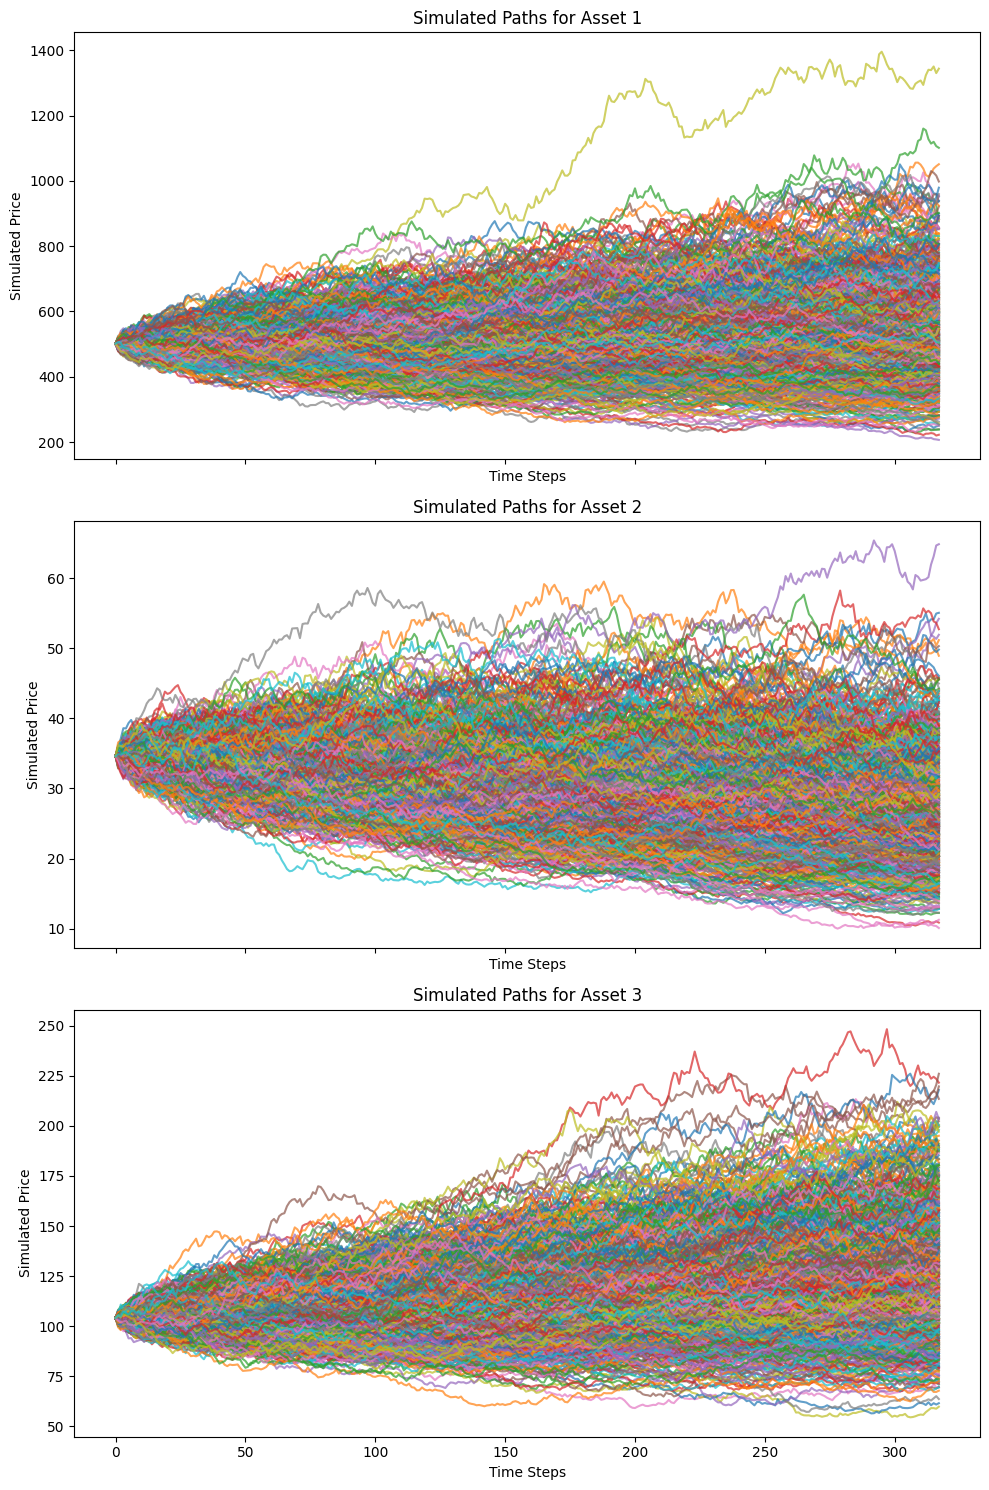

In [20]:
simul = torch.exp(paths[:,:,:,0])
simul = simul.permute(1,2,0)
multi_bs.plot(simul)